In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
data = pd.read_csv(r"C:\Users\user\Downloads\forestfires (1).csv")

In [16]:
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [18]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [28]:
le = LabelEncoder()

data_new = data.apply(le.fit_transform)

In [29]:
data_new

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,1,0,1
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,1,0,0,0,0,1
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
x = data_new.drop(['size_category'] , axis = 1)
y = data_new['size_category']

In [31]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,0,1,0,0,0,0
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,0,1,0
2,10,2,56,56,156,42,55,16,2,0,...,0,0,0,0,0,0,0,0,1,0
3,7,0,67,48,33,64,13,72,8,1,...,0,0,0,0,0,1,0,0,0,0
4,7,3,46,66,46,68,30,73,3,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,9,71,141,7,172,15,5,0,...,0,0,0,0,0,0,0,0,0,0
513,1,3,9,71,141,7,123,54,12,0,...,0,0,0,0,0,0,0,0,0,0
514,1,3,9,71,141,7,116,53,14,0,...,0,0,0,0,0,0,0,0,0,0
515,1,2,92,168,122,80,156,25,8,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='DC', ylabel='Count'>

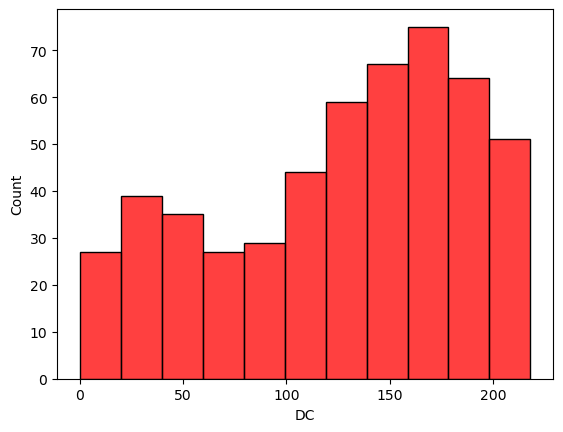

In [47]:
sn.histplot(data_new['DC'] , color = 'red')

In [48]:
data_new.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,7,0,28,37,41,29,12,34,14,0,...,0,0,0,0,1,0,0,0,0,1
1,10,5,56,49,144,42,85,16,1,0,...,0,0,0,0,0,0,0,1,0,1


C:\Users\user\AppData\Local\Temp\ipykernel_13212\2930809785.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_new['temp'] , color = 'red')


<Axes: xlabel='temp', ylabel='Density'>

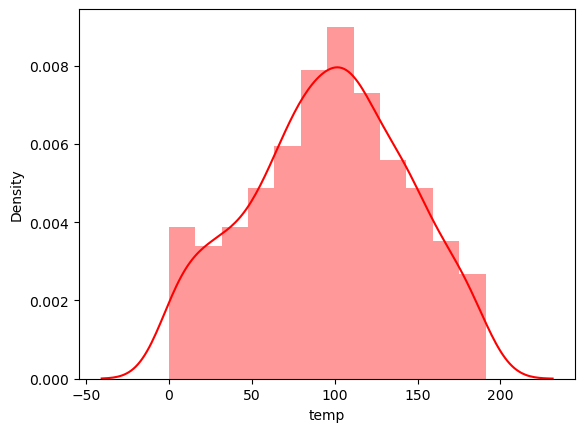

In [49]:
sn.distplot(data_new['temp'] , color = 'red')

In [32]:
x_train , x_test ,y_train , y_test = train_test_split(x , y , test_size = 0.20 , random_state = 42)

In [33]:
x_train.shape , x_test.shape

((413, 30), (104, 30))

In [34]:
clf = SVC()

In [35]:
clf.fit(x_train , y_train )

SVC()

In [36]:
## use classified training data to make prediction on the test data sets

In [37]:
y_pred = clf.predict(x_test)

In [38]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0])

In [25]:
## accuracy of the model

accuracy = accuracy_score(y_test , y_pred)

In [26]:
accuracy

0.75

C:\Users\user\AppData\Local\Temp\ipykernel_13212\1920367718.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data_new)


<Axes: ylabel='Density'>

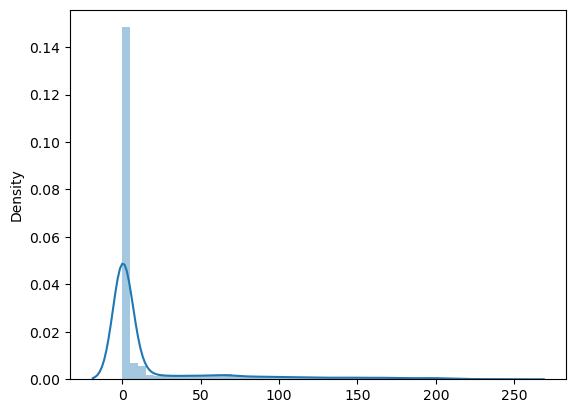

In [44]:
sn.distplot(data_new)

In [32]:
confusion_mt = confusion_matrix(y_test , y_pred)

In [33]:
confusion_mt

array([[ 2, 26],
       [ 0, 76]], dtype=int64)

In [34]:
classification = classification_report(y_test , y_pred)

In [35]:
classification

'              precision    recall  f1-score   support\n\n       large       1.00      0.07      0.13        28\n       small       0.75      1.00      0.85        76\n\n    accuracy                           0.75       104\n   macro avg       0.87      0.54      0.49       104\nweighted avg       0.81      0.75      0.66       104\n'

In [36]:
print(classification)

              precision    recall  f1-score   support

       large       1.00      0.07      0.13        28
       small       0.75      1.00      0.85        76

    accuracy                           0.75       104
   macro avg       0.87      0.54      0.49       104
weighted avg       0.81      0.75      0.66       104



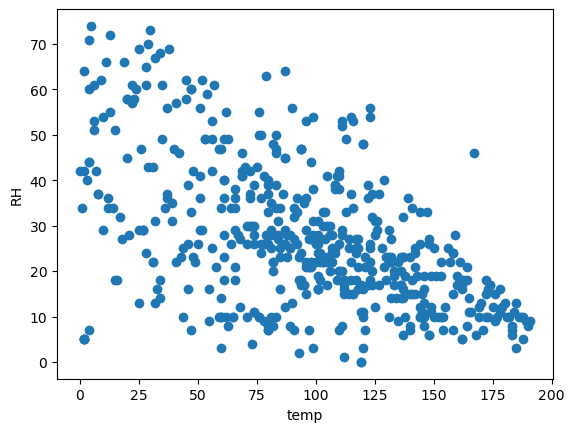

In [57]:
plt.scatter(x = 'temp' , y = 'RH' , data = data_new)
plt.xlabel('temp')
plt.ylabel('RH')
plt.show()